In [29]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# importing all necessary libraries

In [53]:
final_df.shape

(75128, 9)

In [ ]:
final_df.describe()

Time  frontal axis  vertical axis  lateral axis    antenna ID  \
count  75128.000000  75128.000000   75128.000000  75128.000000  75128.000000   
mean     299.080416      0.714211       0.345199     -0.217477      2.409581   
std      257.503002      0.404585       0.419041      0.438219      1.102165   
min        0.000000     -0.748080      -0.553490     -1.336400      1.000000   
25%      121.250000      0.342380      -0.002297     -0.184730      1.000000   
50%      250.715000      0.682420       0.215880     -0.070699      3.000000   
75%      402.500000      1.104500       0.858940      0.031928      3.000000   
max     1739.400000      1.503200       2.030200      1.217800      4.000000   

               RSSI         Phase     Frequency         Label  
count  75128.000000  75128.000000  75128.000000  75128.000000  
mean     -58.277253      3.157279    922.670536      2.528378  
std        5.174083      2.182257      1.679093      0.864258  
min      -72.000000      0.000000    920.250000      1.000000  
25%      -62.000000      1.032400    921.250000      2.000000  
50%      -58.000000      2.767300    922.750000      3.000000  
75%      -56.000000      5.358575    924.250000      3.000000  
max      -38.500000      6.281700    925.750000      4.000000

In [57]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75128 entries, 0 to 177
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Time           75128 non-null  float64
 1   frontal axis   75128 non-null  float64
 2   vertical axis  75128 non-null  float64
 3   lateral axis   75128 non-null  float64
 4   antenna ID     75128 non-null  int64  
 5   RSSI           75128 non-null  float64
 6   Phase          75128 non-null  float64
 7   Frequency      75128 non-null  float64
 8   Label          75128 non-null  int64  
dtypes: float64(7), int64(2)
memory usage: 5.7 MB


In [59]:
final_df.isnull().sum()

Time             0
frontal axis     0
vertical axis    0
lateral axis     0
antenna ID       0
RSSI             0
Phase            0
Frequency        0
Label            0
dtype: int64

In [61]:
final_df

Time  frontal axis  vertical axis  lateral axis  antenna ID  RSSI  \
0      0.00       0.27203        1.00820     -0.082102           1 -63.5   
1      0.50       0.27203        1.00820     -0.082102           1 -63.0   
2      1.50       0.44791        0.91636     -0.013684           1 -63.5   
3      1.75       0.44791        0.91636     -0.013684           1 -63.0   
4      2.50       0.34238        0.96229     -0.059296           1 -63.5   
..      ...           ...            ...           ...         ...   ...   
173  444.00       0.90520        0.64076     -0.082102           1 -59.5   
174  449.00       0.90520        0.64076     -0.082102           1 -59.0   
175  451.50       0.42446        0.91636     -0.161920           1 -53.0   
176  451.58       0.42446        0.91636     -0.161920           1 -52.0   
177  452.25       0.58862        0.87042     -0.082102           1 -60.0   

      Phase  Frequency  Label  
0    2.4252     924.25      1  
1    4.7369     921.75      1  
2    3.0311     923.75      1  
3    2.0371     921.25      1  
4    5.8920     920.25      1  
..      ...        ...    ...  
173  1.9574     922.25      2  
174  6.2540     922.25      2  
175  5.7156     922.25      4  
176  5.8982     922.25      4  
177  5.7033     925.75      4  

[75128 rows x 9 columns]

In [64]:
final_df.isnull().sum()

Time             0
frontal axis     0
vertical axis    0
lateral axis     0
antenna ID       0
RSSI             0
Phase            0
Frequency        0
Label            0
dtype: int64

In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

In [68]:
def variance_inflationfactor(x):
    scaler = StandardScaler()
    scaled_x = scaler.fit_transform(x)
    vif_data = []
    for i in range(scaled_x.shape[1]):
        vif = variance_inflation_factor(scaled_x, i)
        vif_data.append([x.columns[i], vif])
    return pd.DataFrame(vif_data, columns=['name', 'vif'])

In [70]:
variance_inflationfactor(final_df)
# no multicollinearity exists

name       vif
0           Time  1.238886
1   frontal axis  4.416299
2  vertical axis  5.643431
3   lateral axis  2.201832
4     antenna ID  1.137909
5           RSSI  1.130458
6          Phase  1.008756
7      Frequency  1.047439
8          Label  2.554633

<Axes: >

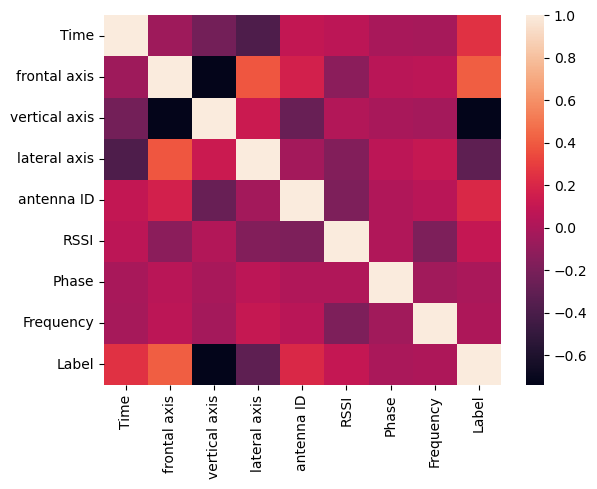

In [72]:
sns.heatmap(final_df.corr())
# correlation 

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Time', ylabel='Count'>

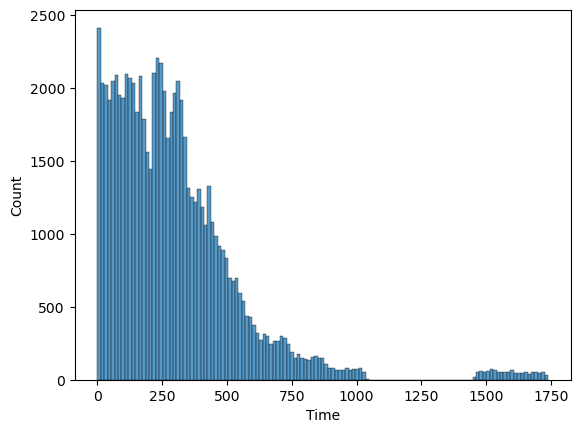

In [74]:
sns.histplot(data=final_df,x='Time')

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='frontal axis', ylabel='Count'>

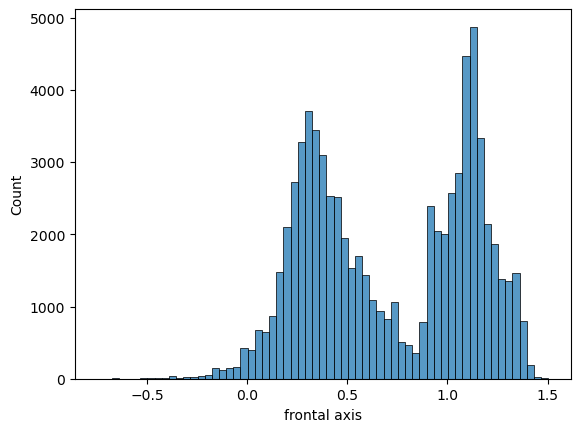

In [76]:
sns.histplot(data=final_df,x='frontal axis')

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='vertical axis', ylabel='Count'>

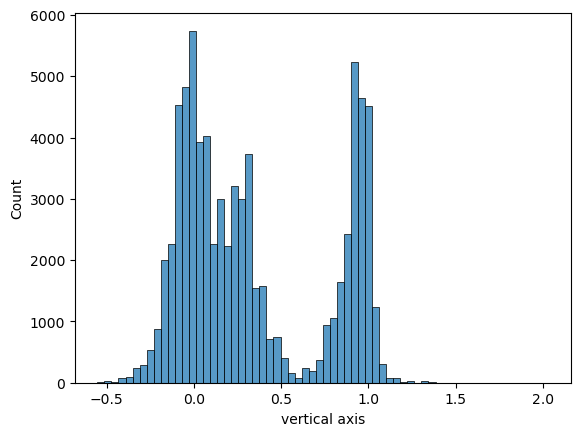

In [78]:
sns.histplot(data=final_df,x='vertical axis')

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='lateral axis', ylabel='Count'>

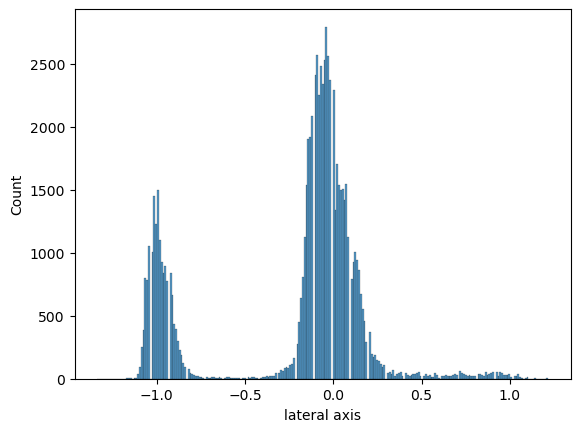

In [79]:
sns.histplot(data=final_df,x='lateral axis')

<Axes: xlabel='antenna ID', ylabel='count'>

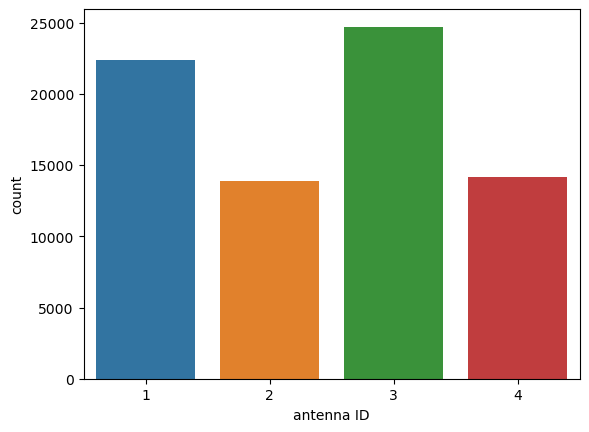

In [81]:
sns.countplot(data=final_df,x='antenna ID')

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='RSSI', ylabel='Count'>

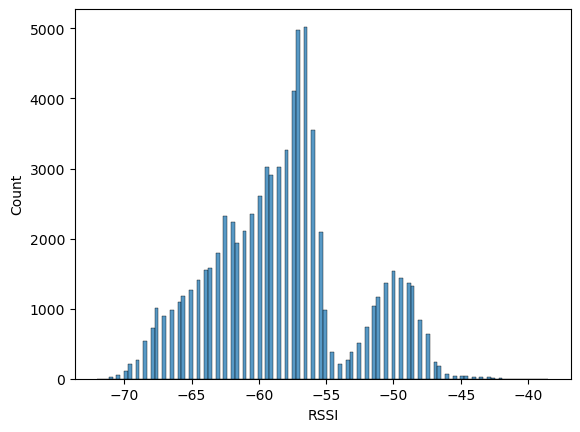

In [82]:
sns.histplot(data=final_df,x='RSSI')

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Phase', ylabel='Count'>

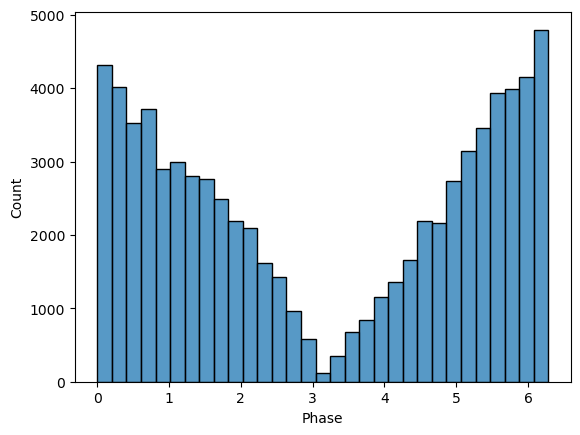

In [83]:
sns.histplot(data=final_df,x='Phase')

<Axes: xlabel='Frequency', ylabel='count'>

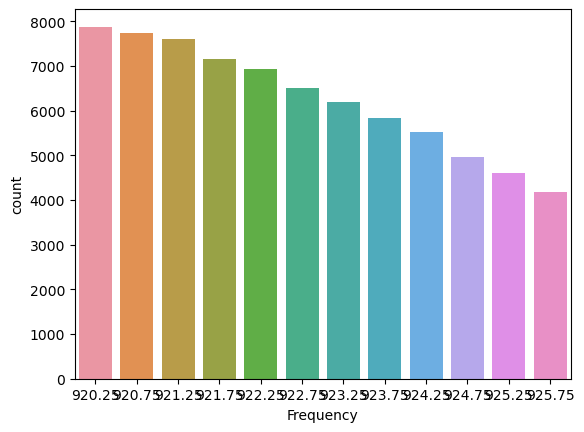

In [85]:
sns.countplot(data=final_df,x='Frequency')

<Axes: xlabel='Label', ylabel='count'>

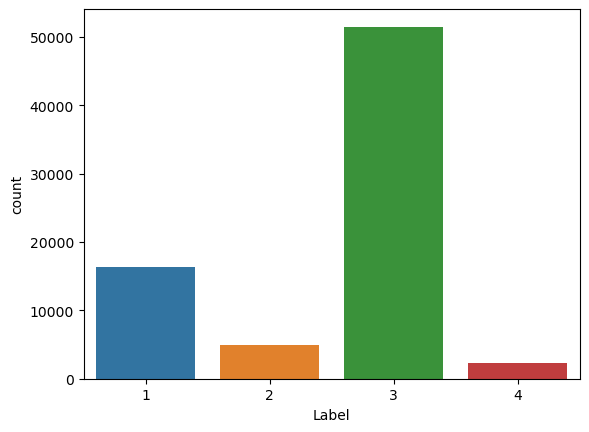

In [87]:
sns.countplot(data=final_df,x='Label')

<Axes: >

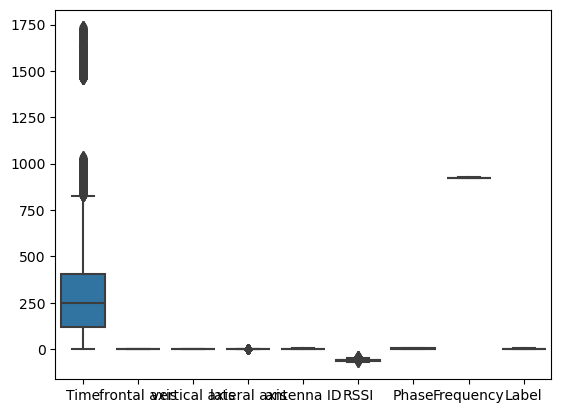

In [96]:
sns.boxplot(data=final_df)

In [100]:
# OUTLIERS EXIST IN THIS DATASet 
# we will try to remove them further when data preprocessing

In [102]:
from ydata_profiling import ProfileReport

In [107]:
profile=ProfileReport(final_df)

In [108]:
profile.to_file("profile_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\HP\anaconda3\Lib\site-packages\ydata_profiling\model\correlations.py:66: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'cannot reindex on an axis with duplicate labels')
  warnings.warn(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [111]:
profile